In [1]:
!pip install customtkinter

In [2]:
import pandas  as  pd
import tkinter as tk
from tkinter import font
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Student_Mental_health.csv")

In [4]:
data.dropna(inplace=True)
data.columns = data.columns.str.strip()
data["Age"] = data["Age"].astype(int)
data["Choose your gender"] = data["Choose your gender"].apply(lambda x: x.strip().lower())
data["What is your course?"] = data["What is your course?"].apply(lambda x: x.strip().lower()[:3])
data["Your current year of Study"] = data["Your current year of Study"].apply(lambda x: int(x.strip().lower()[5]))
data["What is your CGPA?"] = data["What is your CGPA?"].apply(lambda x: (float(x.strip().split()[0])+float(x.strip().split()[2]))/2)
data["Marital status"] = data["Marital status"].apply(lambda x: x.strip().lower())
data["Do you have Depression?"] = data["Do you have Depression?"].apply(lambda x: x.strip().lower())
data["Do you have Anxiety?"] = data["Do you have Anxiety?"].apply(lambda x: x.strip().lower())
data["Do you have Panic attack?"] = data["Do you have Panic attack?"].apply(lambda x: x.strip().lower())
data["Did you seek any specialist for a treatment?"] = data["Did you seek any specialist for a treatment?"].apply(lambda x: x.strip().lower())
data.drop(columns=["Timestamp"], inplace=True)

In [5]:
print(data)

    Choose your gender  Age What is your course?  Your current year of Study  \
0               female   18                  eng                           1   
1                 male   21                  isl                           2   
2                 male   19                  bit                           1   
3               female   22                  law                           3   
4                 male   23                  mat                           4   
..                 ...  ...                  ...                         ...   
96              female   21                  bcs                           1   
97                male   18                  eng                           2   
98              female   19                  nur                           3   
99              female   23                  pen                           4   
100               male   20                  bio                           2   

     What is your CGPA? Marital status 

In [6]:
uni = list(data['What is your course?'].unique())
print(uni)
unid = {}
for i in uni:
    unid[i] = uni.index(i)
print(unid)

['eng', 'isl', 'bit', 'law', 'mat', 'pen', 'bcs', 'hum', 'irk', 'psy', 'ken', 'acc', 'enm', 'mar', 'koe', 'ban', 'bus', 'kir', 'usu', 'taa', 'ala', 'bio', 'ben', 'it', 'cts', 'eco', 'mhs', 'mal', 'kop', 'com', 'dip', 'rad', 'fiq', 'nur']
{'eng': 0, 'isl': 1, 'bit': 2, 'law': 3, 'mat': 4, 'pen': 5, 'bcs': 6, 'hum': 7, 'irk': 8, 'psy': 9, 'ken': 10, 'acc': 11, 'enm': 12, 'mar': 13, 'koe': 14, 'ban': 15, 'bus': 16, 'kir': 17, 'usu': 18, 'taa': 19, 'ala': 20, 'bio': 21, 'ben': 22, 'it': 23, 'cts': 24, 'eco': 25, 'mhs': 26, 'mal': 27, 'kop': 28, 'com': 29, 'dip': 30, 'rad': 31, 'fiq': 32, 'nur': 33}


In [7]:
data.replace({"male": 0, "female": 1}, inplace=True)
data.replace(unid, inplace=True)
data.replace({"yes": 0, "no": 1}, inplace=True)

C:\Users\mguh2\AppData\Local\Temp\ipykernel_6268\3437710911.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"male": 0, "female": 1}, inplace=True)
C:\Users\mguh2\AppData\Local\Temp\ipykernel_6268\3437710911.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(unid, inplace=True)
C:\Users\mguh2\AppData\Local\Temp\ipykernel_6268\3437710911.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infe

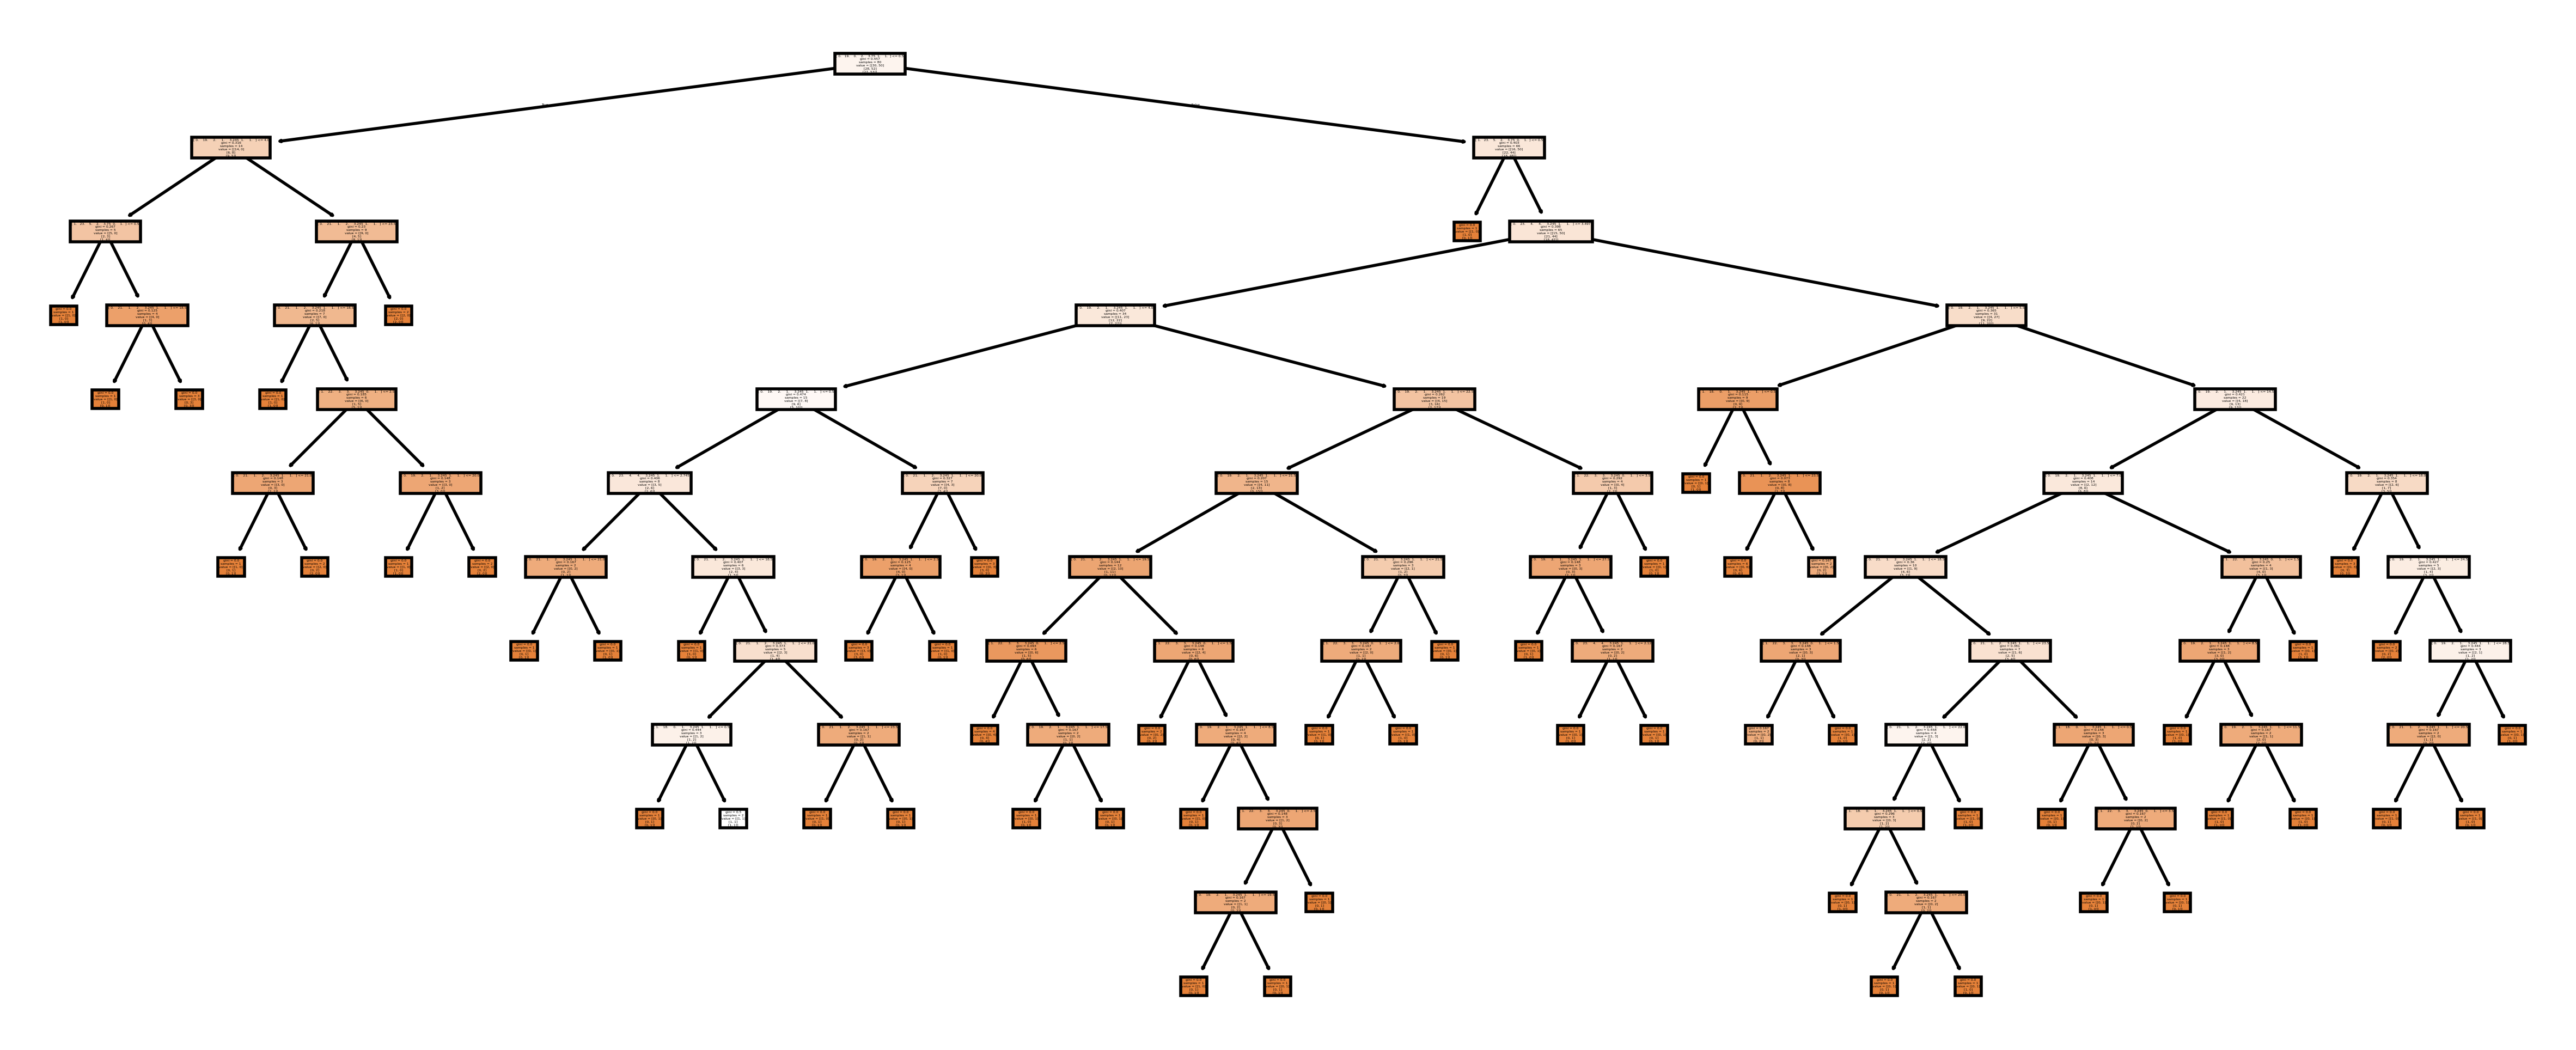

In [8]:
A = data.drop(columns=['Do you have Depression?',  'Do you have Anxiety?',  'Do you have Panic attack?'], axis = 1)
B = data[['Do you have Depression?',  'Do you have Anxiety?',  'Do you have Panic attack?']]

a_train, a_test, b_train, b_test = train_test_split(A,B, test_size = 0.2, random_state = 42)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(a_train, b_train)
predict = dtree.predict(a_test)
A=A.to_numpy()
B=B.to_numpy()

fig, axes = plt.subplots(figsize = (15,6),dpi=400)
tree.plot_tree(dtree,feature_names = A,class_names=B,filled=True)
plt.show()

In [11]:
from tkinter import *
from tkinter import font

# Create main application window
root = Tk()
root.title("Mental Health Prediction")
root.configure(background='orange')

# Add a vertical scrollbar
vscrollbar = Scrollbar(master=root, orient=VERTICAL)
vscrollbar.pack(fill=Y, side=RIGHT, expand=FALSE)

# Add title labels
title_label_1 = Label(root, text="Mental Health Prediction", font=("Arial Black", 16),fg = "Blue")
title_label_1.pack(padx=15, pady=5)
title_label_2 = Label(root, text="Holistic Outlook for Psychological Evaluation", font=("Times New Roman", 14))
title_label_2.pack(padx=15, pady=5)

# Input fields and labels
def add_label_and_entry(master, text, entry_list):
    label = Label(master, text=text, font=("Helvetica", 12))
    label.pack()
    entry = Entry(master)
    entry.pack()
    entry_list.append(entry)

entries = []
add_label_and_entry(root, "Enter your Age:", entries)
add_label_and_entry(root, "Enter your Gender (0 for 'm'/1 for 'f'):", entries)
add_label_and_entry(root, "Enter your Course:", entries)
add_label_and_entry(root, "Enter your current Year of Study:", entries)
add_label_and_entry(root, "Enter your GPA:", entries)
add_label_and_entry(root, "Enter your Marital Status (0 for 'yes'/1 for 'no'):", entries)
add_label_and_entry(root, "Enter whether you have taken Specialist Treatment (0 for 'yes'/1 for 'no'):", entries)

# Prediction function
def values():
    try:
        age = int(entries[0].get().strip())
        gnd = {"m": 0, "f": 1}.get(entries[1].get().strip().lower())
        crs = unid.get(entries[2].get().strip().lower())
        yos = int(entries[3].get())
        gpa = float(entries[4].get())
        mstat = {"y": 0, "n": 1}.get(entries[5].get().strip().lower())
        spc = {"y": 0, "n": 1}.get(entries[6].get().strip().lower())

        Prediction_result = ('Predict disorder: ', dtree.predict([[age, gnd, crs, yos, gpa, mstat, spc]]))
        ans = "Diagnosis\n"

        if Prediction_result[1][0][0] == 0:
            ans += "Depression Prediction = Positive"
        elif Prediction_result[1][0][0] == 1:
            ans += "Depression Prediction = Negative"

        if Prediction_result[1][0][1] == 0:
            ans += "\nAnxiety Prediction = Positive"
        elif Prediction_result[1][0][1] == 1:
            ans += "\nAnxiety Prediction = Negative"

        if Prediction_result[1][0][2] == 0:
            ans += "\nPanic Attack Prediction = Positive"
        elif Prediction_result[1][0][2] == 1:
            ans += "\nPanic Attack Prediction = Negative"

        result_label = Label(root, text=ans, font=("Helvetica", 12))
        result_label.pack(padx=15, pady=15)
    except Exception as e:
        error_label = Label(root, text=f"Error: {str(e)}", font=("Helvetica", 12), fg="red")
        error_label.pack(padx=15, pady=15)

# Predict button
button = Button(root, text="Predict your disorder", command=values, font=("Times New Roman", 12),fg = 'red')
button.pack(padx=15, pady=15)

root.mainloop()


C:\Users\mguh2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
import numpy as np
print(dtree.predict([[21, 0, 0, 2, 3.4, 1, 1]])[0])

[0 0 1]


C:\Users\mguh2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
